In [1]:
import ROOT
import math

ROOT.gROOT.Macro("rootlogon.C")
ROOT.gStyle.SetOptStat(000000)

Welcome to JupyROOT 6.10/04


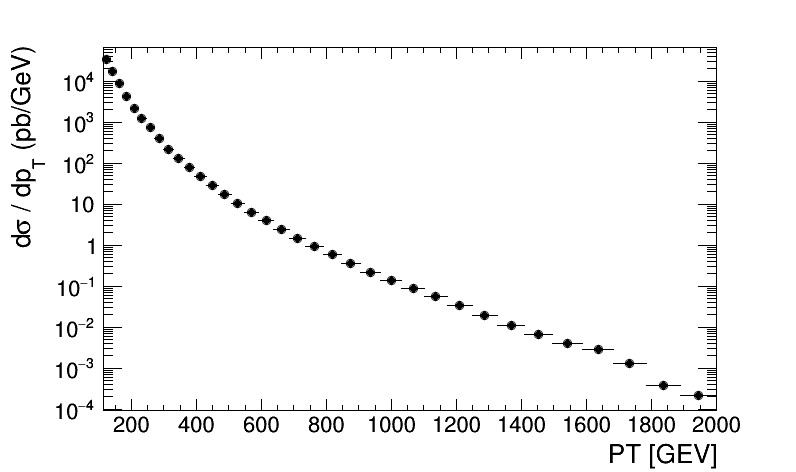

In [2]:
f = ROOT.TFile("HEPData-ins1459051-v1-root.root")

c1 = ROOT.TCanvas("c1", "c1")
hists = []

# Eta bins from the HEPData tables
w_eta = [ 0.5, 0.5, 0.5, 0.5, 0.5 ]

for i in xrange(1,6):
    h1 = f.Get("Table " + str(i) +"/Hist1D_y1").Clone('h1_' + str(i))
    h2 = f.Get("Table " + str(i) +"/Hist1D_y1_e2").Clone('h2_' + str(i))
    
    for ibin in xrange(0,h1.GetNbinsX()+1):
        h1.SetBinError(ibin, h2.GetBinContent(ibin))
    hists.append(h1)



for ipt in xrange(1,hists[0].GetNbinsX()) :
    val = hists[0].GetBinContent(ipt)
    err = hists[0].GetBinError(ipt)
    #err *= err
    for ieta in xrange(1,len(hists)):
        if ipt < hists[ieta].GetNbinsX() : 
            vali = hists[ieta].GetBinContent(ipt)
            erri = hists[ieta].GetBinError(ipt) 
            #erri *= erri
            val += vali
            err += erri
    
        
    hists[0].SetBinContent( ipt, val )
    hists[0].SetBinError( ipt, err )
    

hists[0].SetTitle('')
hists[0].GetYaxis().SetTitle("d#sigma / dp_{T} (pb/GeV)")
hists[0].GetYaxis().SetTitleOffset(1.0)
hists[0].Draw('e')
c1.SetLogy()
c1.Draw()

 vals =  2219.88696289 ,  64.4016798131  ratio =  34.4693953532
 vals =  218.866790771 ,  14.4795257767  ratio =  15.1156048994
 vals =  46.5644493103 ,  2.31821315761  ratio =  20.0863536458
 vals =  17.1240310669 ,  0.516258429431  ratio =  33.1694943669
 vals =  0.138145029545 ,  0.00270294072567  ratio =  51.1091598246
 vals =  0.0333322286606 ,  0.000678663998583  ratio =  49.1144789324


Info in <TCanvas::Print>: png file compare_smp15007_smp16010.png has been created
Info in <TCanvas::Print>: pdf file compare_smp15007_smp16010.pdf has been created


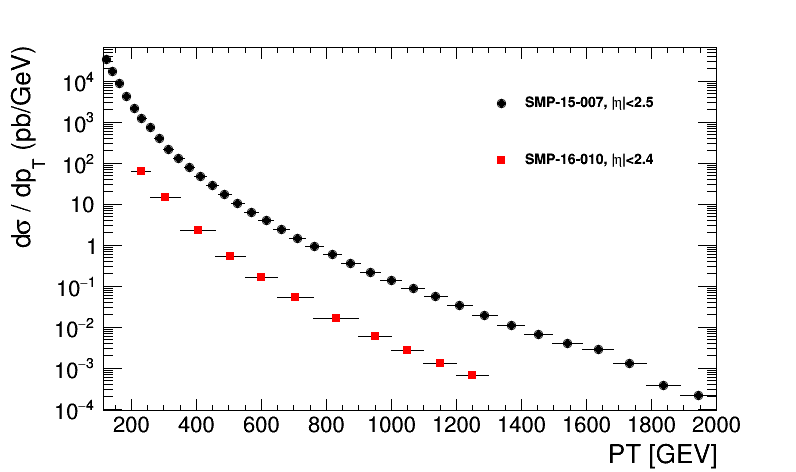

In [3]:
f2 = ROOT.TFile("pt_xs.root")

c2d_response_nomnom_ptcanvas = f2.Get("c2d_response_nomnom_ptcanvas")

l = c2d_response_nomnom_ptcanvas.GetPrimitive("padc2d_response_nomnom_ptcanvas1")
h = l.GetPrimitive("2d_response_nomnom_ptplot").Clone("ours")
#h.Scale(88132650.2081 / 2300. / h.Integral("width") )
h.SetMarkerStyle(21)
h.SetMarkerColor(2)

c2 = ROOT.TCanvas("c2", "c2")
hists[0].Draw()   
h.Draw('e same')


leg = ROOT.TLegend(0.6, 0.6, 0.84, 0.84)
leg.SetFillColor(0)
leg.SetBorderSize(0)
leg.AddEntry( hists[0], "SMP-15-007, |#eta|<2.5", 'p')
leg.AddEntry( h, "SMP-16-010, |#eta|<2.4", 'p')
leg.Draw()

c2.SetLogy()
c2.Draw()
c2.Print("compare_smp15007_smp16010.png", "png")
c2.Print("compare_smp15007_smp16010.pdf", "pdf")


for testbin in [200, 300, 400, 500, 1000, 1200]:
    bin_1 = hists[0].GetXaxis().FindBin(testbin)
    bin_2 = h.GetXaxis().FindBin(testbin)

    val_1 = hists[0].GetBinContent(bin_1)
    val_2 =  h.GetBinContent(bin_2)

    print ' vals = ', val_1, ', ', val_2, ' ratio = ', val_1 / val_2
